In [1]:
import sympy
import numpy
import matplotlib.pyplot as plt
x = sympy.symbols('x')

In [2]:
inp_x = [-2, -1, 0, 1, 2]
inp_y = [0.13534, 0.36788, 1, 2.7183, 7.3891]
xin = 0.2
n = len(inp_x)

In [3]:
h = numpy.zeros(n - 1)
alpha = numpy.zeros(n - 1)
b = numpy.zeros(n - 1)
d = numpy.zeros(n - 1)
c = numpy.zeros(n)
l = numpy.ones(n)
m = numpy.zeros(n)
z = numpy.zeros(n)

In [4]:
for i in range(n - 1):
    h[i] = inp_x[i + 1] - inp_x[i]
for i in range(n - 1):
    #alpha[i] = 3 / h[i] * (inp_y[i + 1] - inp_y[i])  - 3 / h[i - 1] * (inp_y[i] - inp_y[i - 1])
    alpha[i]=inp_y[i];
for i in range(1, n - 1):
    l[i] = 2 * (inp_x[i + 1] - inp_x[i - 1]) - h[i - 1] * m[i - 1]
    m[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]
for i in range(n - 2, -1, -1):
    c[i] = z[i] - m[i] * c[i + 1]
    b[i] = ((inp_y[i + 1] - inp_y[i]) / h[i]) - (h[i] * (c[i + 1] + 2 * c[i]) / 3)
    d[i] = (c[i + 1] - c[i]) / (3 * h[i])

In [5]:
f = []
for i in range(n - 1):
    f.append(inp_y[i] + b[i] * (x - inp_x[i]) + c[i] * (pow(x - inp_x[i], 2)) + d[i] * (pow(x - inp_x[i], 3)))
print(f)

[0.207322738095238*x + 0.0252172619047619*(x + 2)**3 + 0.549985476190476, 0.559927857142857*x - 0.00345964285714285*(x + 1)**3 + 0.0756517857142857*(x + 1)**2 + 0.927807857142857, 0.199327976190476*x**3 + 0.0652728571428572*x**2 + 1.45369916666667*x + 1, 4.22862880952381*x - 0.221085595238095*(x - 1)**3 + 0.663256785714286*(x - 1)**2 - 1.51032880952381]


In [6]:
def cubic_spline(x_in, f, inp_x, n):
    maxind = n
    for i in range(n - 1, -1, -1):
        if (x_in < inp_x[i]):
            maxind = i
    return f[maxind - 1].subs(x, x_in)

In [7]:
print("Значение кубического сплайна (в точке x = ", xin, ") = ", cubic_spline(xin, f, inp_x, n), sep="")

Значение кубического сплайна (в точке x = 0.2) = 1.29494537142857


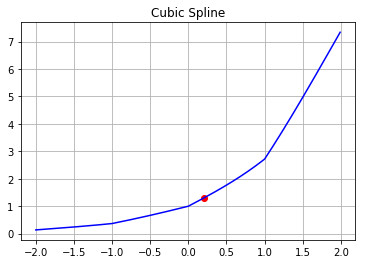

In [8]:
x_gr = []
y_gr = []
for i in range((inp_x[n - 1] - inp_x[0]) * 100):
    x_gr.append(inp_x[0] + i / 100)
    y_gr.append(cubic_spline(inp_x[0] + i / 100, f, inp_x, n))
plt.title('Cubic Spline')
plt.grid(True)
plt.scatter(xin, cubic_spline(xin, f, inp_x, n), color='red')
plt.plot(x_gr, y_gr, color='blue')
plt.show()

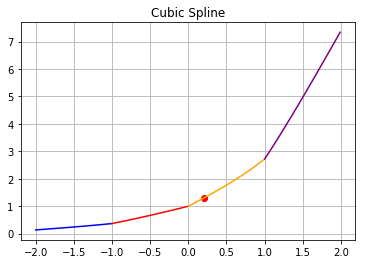

In [9]:
x_gr = []
y_gr = []
for i in range(100):
    x_gr.append(inp_x[0] + i / 100)
    y_gr.append(cubic_spline(inp_x[0] + i / 100, f, inp_x, n))
plt.title('Cubic Spline')
plt.grid(True)
plt.scatter(xin, cubic_spline(xin, f, inp_x, n), color='red')
plt.plot(x_gr, y_gr, color='blue')
x_gr = []
y_gr = []
for i in range(100):
    x_gr.append(inp_x[1] + i / 100)
    y_gr.append(cubic_spline(inp_x[1] + i / 100, f, inp_x, n))
plt.plot(x_gr, y_gr, color='red')
x_gr = []
y_gr = []
for i in range(100):
    x_gr.append(inp_x[2] + i / 100)
    y_gr.append(cubic_spline(inp_x[2] + i / 100, f, inp_x, n))
plt.plot(x_gr, y_gr, color='orange')
x_gr = []
y_gr = []
for i in range(100):
    x_gr.append(inp_x[3] + i / 100)
    y_gr.append(cubic_spline(inp_x[3] + i / 100, f, inp_x, n))
plt.plot(x_gr, y_gr, color='purple')
#plt.plot(x_gr, y_gr, color='green')
plt.show()

In [10]:
print('  '.join(map(str, alpha)))

0.13534  0.36788  1.0  2.7183


In [11]:
print('  '.join(map(str, b)))

0.2073227380952381  0.5599278571428572  1.4536991666666668  4.228628809523809


In [12]:
print('  '.join(map(str, c)))

0.0  0.07565178571428571  0.06527285714285716  0.6632567857142857  0.0


In [13]:
print('  '.join(map(str, d)))

0.025217261904761906  -0.003459642857142851  0.19932797619047618  -0.22108559523809523


# в точке 1 вычеслить значение первой и второй производной 

In [14]:
print(sympy.diff(f[2]).subs(x, 1))
print(sympy.diff(f[3]).subs(x, 1))

2.18222880952381
4.22862880952381


In [15]:
print(sympy.diff(sympy.diff(f[2])).subs(x, 1))
print(sympy.diff(sympy.diff(f[3])).subs(x, 1))

1.32651357142857
1.32651357142857
